# Password Strength Detector

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv', error_bad_lines=False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

In [4]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [5]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [6]:
data.dropna(inplace=True)

In [7]:
data[data['password'].isnull()]

,password,strength


<AxesSubplot:xlabel='strength', ylabel='count'>

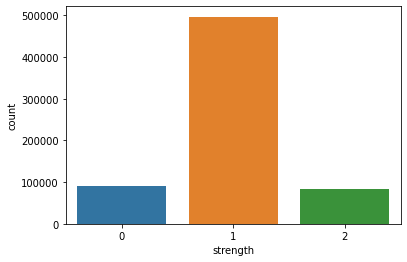

In [8]:
sns.countplot(data['strength'])

### Imbalance in the dataset

In [9]:
password_tuple = np.array(data)

#### shuffle for model robustness

In [11]:
import random
random.shuffle(password_tuple)

In [17]:
x = [labels[0] for labels in password_tuple]
y = [labels[1] for labels in password_tuple]

In [13]:

def word_to_char_list(inputs):
    char = []
    for i in inputs:
        char.append(i)
    return char

In [20]:
word_to_char_list('asdkahjq3')

['a', 's', 'd', 'k', 'a', 'h', 'j', 'q', '3']

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vectorizer = TfidfVectorizer(tokenizer=word_to_char_list)

In [21]:
X = vectorizer.fit_transform(x)

In [27]:
X.shape

(669639, 127)

In [29]:
vectorizer.get_feature_names()

['\x05',
 '\x06',
 '\x10',
 '\x11',
 '\x12',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '¡',
 '¤',
 '§',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¹',
 'º',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'é',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'œ',
 '—',
 '‚',
 '‹',
 '›',
 '™']

In [37]:
first_document_vector = X[0]

In [38]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56688048],
        [0.        ],
        [0.59144167],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [44]:
#one single data point
df = pd.DataFrame(data=first_document_vector.T.todense(), index=vectorizer.get_feature_names(), columns=['TF-IDF'])
df

,TF-IDF
,0.0
,0.0
,0.0
,0.0
,0.0
...,...
—,0.0
‚,0.0
‹,0.0
›,0.0


In [43]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
X_train.shape

(535711, 127)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
clf = LogisticRegression(random_state=0, multi_class='multinomial')

In [59]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [84]:
dt = np.array(['password12!3'])
pred = vectorizer.transform(dt)
clf.predict(pred)

array([2])

In [85]:
y_pred = clf.predict(X_test)

## Performance metrics

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [95]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')  

Confusion matrix, without normalization
[[ 5371 12626    17]
 [ 3899 92684  2557]
 [   31  5060 11683]]


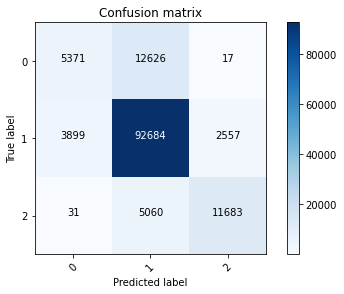

In [97]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=[0,1,2])

In [98]:
score = accuracy_score(y_test, y_pred)
print('testing accuracy - ', score)

testing accuracy -  0.8193805626904008


In [92]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.30      0.39     18014
           1       0.84      0.93      0.88     99140
           2       0.82      0.70      0.75     16774

    accuracy                           0.82    133928
   macro avg       0.75      0.64      0.68    133928
weighted avg       0.80      0.82      0.80    133928

